<a href="https://colab.research.google.com/github/Epoggi/swd4tn023_KoneoppimisenSeminaari/blob/main/swd4tn023_KoneoppimisenSeminaari_NH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutoriaalista kiitos Laurence Moroney ja [codelabs](https://codelabs.developers.google.com/codelabs/tensorflow-lab2-computervision/#1) 

Importataan tensorflow kirjasto

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.3.0


Sieltä saamme opetus kuvat ja testi kuvat, dokumentoitu täällä [TensorFlow/Api/fashion_mnist/overview](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist)

In [ ]:
mnist_fashion = tf.keras.datasets.fashion_mnist

Asetamme ne omiin muuttujiin, [Tensorflow/api/fashion_mnist/load_data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data)

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist_fashion.load_data()

Seuraavalla koodilla voimme testata miltä opetus datan kuvat ja numeraaliset arvot näyttävät

In [ ]:
import matplotlib.pyplot as plt
#Seuraavilla komennoilla voi printtaa kuvan, sekä siihen liittyvät numeraaliset arvot
#plt.imshow(training_images[0])
#print(training_labels[0])
#print(training_images[0])

Näemme testaamalla, että arvot ovat 0-255 välillä, voimme normalisoida ne helposti Pythonin avulla

**Miksi normalisoidaan** kiitos Shridhar R Kulkarni [stackoverflowssa](https://stackoverflow.com/questions/48284427/why-should-we-normalize-data-for-deep-learning-in-keras)

Otetaan esimerkiksi yksinkertainen ohjelma joka arvioi annetaanko lainaa vai ei.

Annetaan arvot Age ja Income ja suoritetaan yhtälö:

Y = weight_1 * (Age) + weight_2 * (Income) + some_constant

Selityksen vuoksi, ikä on yleensä jotain 0 ja 120 välillä ja tulot 10 000 ja 100 000 välillä. Niiden numeraalinen ero on valtava ja siten niiden punnitus suoraan olisi ongelmallista.

Asetetaan ne painoiksi (weight_1, weight_2) joiden arvot ovat 0 ja 1 välillä jolloin niiden punnitus on tasa-arvoinen, eikä näin ollen Bill Gates kuolinvuoteellaan voi nostaa astronomista lainaa.

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Nyt voimme alkaa operoimaan oppimista.
*   Flatten =  muuntaa neliöstä yksi dimensionaalisen, eli yhden rivin numeroita.
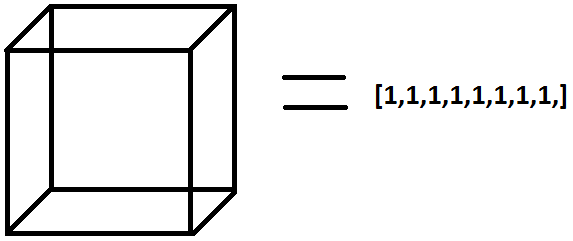
*   Dense = lisää neuroni tason.
*   relu = jotenkuten näin, if (x > 0) {return x} else {return 0} se siirtää arvot 0 tai yli seuraavalle neuroni tasolle. 
*   softmax = Ottaa kasan arvoja valitsee isoimman. Jos viimeisen tason ulosanti näyttää tältä [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], palauttaa se tämän [0,0,0,0,1,0,0,0,0].

Tässä kohtaa on mahdollista lisätä lisää neuroni tasoja, mutta kannattanee odottaa kun pääsemme callback funktioon




In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Nyt meni Aatami yli hilseen.

Noh kun meillä on model valmis, seuraavaksi se rakennetaan.

Ensin se kasataan optimizer ja loss funktiolla, sitten käydään läpi opetus data ja labels.

Modelin tarkoitus on yrittää ymmärtää opetus datan ja labelsien yhteys.

Seuraaksi testataan uuden datan kanssa.

Metrics parametri laittaan TensorFlown reportoimaan kuinka hyvin tuo testaus onnistuu vertaamalla opetuksen tuloksia testi datan tuloksiin.

In [ ]:
model.compile(optimizer = 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4925 - accuracy: 0.8255
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3728 - accuracy: 0.8663
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3370 - accuracy: 0.8764
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3122 - accuracy: 0.8842
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2938 - accuracy: 0.8911


Voimme testata miten model toimii ilman opetusta

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4005 - accuracy: 0.8505


[0.4005454480648041, 0.8504999876022339]

Lets testataan lisää, seuraava pätkä näyttää miten ohjelma arvioi jokaisen itemin. arvoja on 10 ja ne näyttävät prosentuaalisen todennäköisyyden mihin kategoriaan kyseinen itemi kuuluu. 

Softmax määrittää arvot 0 ja 1 välille.

10 Luokkaa tarkoittaa jokaista erilaista vaatekappaletta, joita on luokiteltu treeni labeleihin

In [ ]:
classifications = model.predict(test_images)
print(classifications[0])

[1.66711561e-06 4.33559827e-10 1.17425344e-07 4.57204798e-08
 8.22639947e-08 1.10847841e-03 8.29198689e-06 2.06867885e-02
 1.23126329e-05 9.78182197e-01]


Otetaan käyttöön callback toiminto, voimme siihen määrittää halutun tarkkuuden, jonka saavutettua voimme pysäyttää operaation.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      print("\nHaluttu tarkkuus 90% saavutettu!")
      self.model.stop_training = True

callbacks = myCallback()
#En ole ihan varma miksi tutoriaalissa haluttiin nämä määritellä uusiksi
mnist_fashion = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist_fashion.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
#Määritellään model tähän uudestaan jotta voimme helposti muokata haluamiamme arvoja
#Lisää neuroni kerroksia tällä tf.keras.layers.Dense(jotain, activation=tf.nn.relu),
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  #tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  #tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
#Pääsin 99% tarkkuuteen noin 250 kierroksella(epochs), säädin myös neuroni kerroksia
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=15, callbacks=[callbacks])

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4723 - accuracy: 0.8314
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3572 - accuracy: 0.8690
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3219 - accuracy: 0.8810
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2973 - accuracy: 0.8888
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2782 - accuracy: 0.8961
Epoch 6/15
1866/1875 [============================>.] - ETA: 0s - loss: 0.2653 - accuracy: 0.9009
Haluttu tarkkuus 90% saavutettu!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2652 - accuracy: 0.9009


Kiitokset osallistumisesta tutoriaaliin. Suomennokset ja mielivaltaiset muutokset Niko Hautala

**Lopuksi**

Vaihdetaan datasettiä, setit löytyy [tensorflowlta](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/) (mnist, käsinkirjoitettuja numeroita)

Lähteenä: [TensorFlow](https://www.tensorflow.org/guide/keras/functional)

Sitten kokeillaan, huomioitavaa .reshape jota käytetään tämän datan muokkaamiseen vektoreiksi

In [ ]:
class uusiCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nHaluttu tarkkuus 95% saavutettu!")
      self.model.stop_training = True

callbacks = uusiCallback()

mnist = tf.keras.datasets
#Tässä kohtaa voimme määritellä datasetin
(training_data, training_names), (test_data, test_names) = mnist.mnist.load_data()

training_data=training_data.reshape(60000, 784).astype("float32") / 255
test_data=test_data.reshape(10000, 784).astype("float32") / 255

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  #tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  #tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_data, training_names, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2029 - accuracy: 0.9399
Epoch 2/5
1875/1875 [==============================] - ETA: 0s - loss: 0.0814 - accuracy: 0.9750
Haluttu tarkkuus 95% saavutettu!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0814 - accuracy: 0.9750


Katsellaan vielä dataa

data 0:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253
  253 253 174   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252
  252 252 252 158  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252
  252 252 252 252  59   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 252 252 230 1

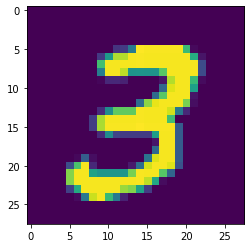

In [ ]:
mnist = tf.keras.datasets
#Tässä kohtaa voimme määritellä datasetin
(training_data, training_names), (test_data, test_names) = mnist.mnist.load_data()

import matplotlib.pyplot as plt
#Seuraavilla komennoilla voi printtaa kuvan, sekä siihen liittyvät numeraaliset arvot
plt.imshow(training_data[7])
print("data 0: ", training_data[7])
print("label 0: ", training_names[7])